In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train,Y_train),(X_test,Y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
print("X_train shape: ",X_train.shape)
print("Y_train shape ",Y_train.shape)
print("X_test shape: ",X_test.shape)
print("Y_test shape: ",Y_test.shape)

X_train shape:  (50000, 32, 32, 3)
Y_train shape  (50000, 1)
X_test shape:  (10000, 32, 32, 3)
Y_test shape:  (10000, 1)


In [4]:
X = np.append(X_train,X_test,axis=0)
Y = np.append(Y_train,Y_test,axis=0)

In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state = 8)

In [6]:
Y_train = Y_train.reshape(-1,)
Y_test = Y_test.reshape(-1,)

In [7]:
print("X_train shape: ",X_train.shape)
print("Y_train shape ",Y_train.shape)
print("X_test shape: ",X_test.shape)
print("Y_test shape: ",Y_test.shape)

X_train shape:  (42000, 32, 32, 3)
Y_train shape  (42000,)
X_test shape:  (18000, 32, 32, 3)
Y_test shape:  (18000,)


In [ ]:
#Basic CNN with no batch normalization
cnn_model = keras.models.Sequential([
                  #feature extraction (cnn part)
                  keras.layers.Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu",input_shape=(32,32,3)),
                  keras.layers.MaxPooling2D(),
                  #layers
                  keras.layers.Flatten(),
                  keras.layers.Dense(256,activation="relu"),
                  keras.layers.Dense(10,activation="softmax")
])

In [ ]:
sgd = keras.optimizers.SGD(learning_rate=0.002)
cnn_model.compile(optimizer=sgd,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
cnn_model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1313/1313 [==============================] - 47s 13ms/step - loss: 15.7448 - accuracy: 0.2842
Epoch 2/10
1313/1313 [==============================] - 17s 13ms/step - loss: 1.4218 - accuracy: 0.5060
Epoch 3/10
1313/1313 [==============================] - 17s 13ms/step - loss: 1.0907 - accuracy: 0.6203
Epoch 4/10
1313/1313 [==============================] - 17s 13ms/step - loss: 0.8853 - accuracy: 0.6919
Epoch 5/10
1313/1313 [==============================] - 17s 13ms/step - loss: 0.6656 - accuracy: 0.7686
Epoch 6/10
1313/1313 [==============================] - 17s 13ms/step - loss: 0.5000 - accuracy: 0.8280
Epoch 7/10
1313/1313 [==============================] - 17s 13ms/step - loss: 0.3642 - accuracy: 0.8799
Epoch 8/10
1313/1313 [==============================] - 17s 13ms/step - loss: 0.2568 - accuracy: 0.9169
Epoch 9/10
1313/1313 [==============================] - 17s 13ms/step - loss: 0.1834 - accuracy: 0.9450
Epoch 10/10
1313/1313 [==============================] - 17s 13

In [ ]:
cnn_model.evaluate(X_test,Y_test)

563/563 [==============================] - 3s 5ms/step - loss: 1.9524 - accuracy: 0.6076


[1.9523693323135376, 0.6075555682182312]

In [ ]:
Y_pred = cnn_model.predict(X_test)

In [ ]:
Y_pred_classes = np.argmax(Y_pred,axis=1)

In [ ]:
print(classification_report(Y_test,Y_pred_classes))

              precision    recall  f1-score   support

           0       0.63      0.64      0.64      1748
           1       0.75      0.72      0.73      1802
           2       0.53      0.45      0.48      1712
           3       0.43      0.40      0.42      1808
           4       0.56      0.52      0.54      1877
           5       0.48      0.48      0.48      1857
           6       0.64      0.72      0.68      1779
           7       0.59      0.71      0.65      1745
           8       0.76      0.72      0.74      1827
           9       0.67      0.72      0.70      1845

    accuracy                           0.61     18000
   macro avg       0.61      0.61      0.61     18000
weighted avg       0.61      0.61      0.61     18000



In [ ]:
#Basic CNN with  batch normalization
cnn_model = keras.models.Sequential([
                  #feature extraction (cnn part)
                  keras.layers.Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu",input_shape=(32,32,3)),
                  keras.layers.MaxPooling2D(),
                  keras.layers.BatchNormalization(),
                  #layers
                  keras.layers.Flatten(),
                  keras.layers.Dense(256,activation="relu"),
                  keras.layers.Dense(10,activation="softmax")
])

In [ ]:
sgd = keras.optimizers.SGD(learning_rate=0.002)
cnn_model.compile(optimizer=sgd,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
cnn_model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1313/1313 [==============================] - 18s 14ms/step - loss: 1.6687 - accuracy: 0.4228
Epoch 2/10
1313/1313 [==============================] - 18s 14ms/step - loss: 1.0632 - accuracy: 0.6268
Epoch 3/10
1313/1313 [==============================] - 18s 14ms/step - loss: 0.8406 - accuracy: 0.7069
Epoch 4/10
1313/1313 [==============================] - 18s 14ms/step - loss: 0.6736 - accuracy: 0.7707
Epoch 5/10
1313/1313 [==============================] - 18s 14ms/step - loss: 0.5392 - accuracy: 0.8222
Epoch 6/10
1313/1313 [==============================] - 18s 14ms/step - loss: 0.4344 - accuracy: 0.8660
Epoch 7/10
1313/1313 [==============================] - 18s 14ms/step - loss: 0.3381 - accuracy: 0.9018
Epoch 8/10
1313/1313 [==============================] - 18s 14ms/step - loss: 0.2692 - accuracy: 0.9287
Epoch 9/10
1313/1313 [==============================] - 18s 13ms/step - loss: 0.2121 - accuracy: 0.9496
Epoch 10/10
1313/1313 [==============================] - 18s 14m

In [ ]:
cnn_model.evaluate(X_test,Y_test)

563/563 [==============================] - 3s 6ms/step - loss: 1.0753 - accuracy: 0.6780


[1.0753014087677002, 0.6779999732971191]

In [ ]:
Y_pred = cnn_model.predict(X_test)

In [ ]:
Y_pred_classes = np.argmax(Y_pred,axis=1)

In [ ]:
print(classification_report(Y_test,Y_pred_classes))

              precision    recall  f1-score   support

           0       0.75      0.68      0.71      1748
           1       0.81      0.78      0.80      1802
           2       0.52      0.62      0.57      1712
           3       0.47      0.51      0.49      1808
           4       0.70      0.55      0.62      1877
           5       0.51      0.65      0.57      1857
           6       0.77      0.74      0.76      1779
           7       0.78      0.71      0.74      1745
           8       0.75      0.83      0.79      1827
           9       0.84      0.71      0.77      1845

    accuracy                           0.68     18000
   macro avg       0.69      0.68      0.68     18000
weighted avg       0.69      0.68      0.68     18000



In [ ]:
#Basic CNN with  batch normalization and 2 layers of convolution
cnn_model = keras.models.Sequential([
                  #feature extraction (cnn part)
                  keras.layers.Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu",input_shape=(32,32,3)),
                  keras.layers.MaxPooling2D(),
                  keras.layers.BatchNormalization(),
                  keras.layers.Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu"),
                  keras.layers.MaxPooling2D(),
                  keras.layers.BatchNormalization(),
                  #layers
                  keras.layers.Flatten(),
                  keras.layers.Dense(256,activation="relu"),
                  keras.layers.Dense(10,activation="softmax")
])

In [ ]:
sgd = keras.optimizers.SGD(learning_rate=0.002)
cnn_model.compile(optimizer=sgd,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
cnn_model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1313/1313 [==============================] - 23s 17ms/step - loss: 1.6252 - accuracy: 0.4352
Epoch 2/10
1313/1313 [==============================] - 21s 16ms/step - loss: 1.0380 - accuracy: 0.6337
Epoch 3/10
1313/1313 [==============================] - 21s 16ms/step - loss: 0.8313 - accuracy: 0.7094
Epoch 4/10
1313/1313 [==============================] - 21s 16ms/step - loss: 0.6976 - accuracy: 0.7606
Epoch 5/10
1313/1313 [==============================] - 21s 16ms/step - loss: 0.5973 - accuracy: 0.8003
Epoch 6/10
1313/1313 [==============================] - 21s 16ms/step - loss: 0.4971 - accuracy: 0.8392
Epoch 7/10
1313/1313 [==============================] - 21s 16ms/step - loss: 0.4201 - accuracy: 0.8708
Epoch 8/10
1313/1313 [==============================] - 21s 16ms/step - loss: 0.3586 - accuracy: 0.8956
Epoch 9/10
1313/1313 [==============================] - 21s 16ms/step - loss: 0.3056 - accuracy: 0.9159
Epoch 10/10
1313/1313 [==============================] - 21s 16m

In [ ]:
cnn_model.evaluate(X_test,Y_test)

563/563 [==============================] - 4s 7ms/step - loss: 0.8987 - accuracy: 0.7110


[0.8986614942550659, 0.7110000252723694]

In [ ]:
Y_pred = cnn_model.predict(X_test)

In [ ]:
Y_pred_classes = np.argmax(Y_pred,axis=1)

In [ ]:
print(classification_report(Y_test,Y_pred_classes))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74      1748
           1       0.76      0.87      0.81      1802
           2       0.59      0.64      0.62      1712
           3       0.49      0.65      0.56      1808
           4       0.70      0.67      0.68      1877
           5       0.68      0.50      0.57      1857
           6       0.83      0.71      0.77      1779
           7       0.76      0.77      0.77      1745
           8       0.87      0.78      0.82      1827
           9       0.81      0.76      0.79      1845

    accuracy                           0.71     18000
   macro avg       0.72      0.71      0.71     18000
weighted avg       0.72      0.71      0.71     18000



In [ ]:
#CNN with  batch normalization and 3 layers of convolution
cnn_model = keras.models.Sequential([
                  #feature extraction (cnn part)
                  keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu",input_shape=(32,32,3)),
                  keras.layers.MaxPooling2D(),
                  keras.layers.BatchNormalization(),
                  keras.layers.Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu"),
                  keras.layers.MaxPooling2D(),
                  keras.layers.BatchNormalization(),
                  keras.layers.Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"),
                  keras.layers.MaxPooling2D(),
                  keras.layers.BatchNormalization(),
                  #layers
                  keras.layers.Flatten(),
                  keras.layers.Dense(256,activation="relu"),
                  keras.layers.Dense(10,activation="softmax")
])

In [ ]:
sgd = keras.optimizers.SGD(learning_rate=0.002)
cnn_model.compile(optimizer=sgd,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
cnn_model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1313/1313 [==============================] - 23s 16ms/step - loss: 1.5945 - accuracy: 0.4447
Epoch 2/10
1313/1313 [==============================] - 21s 16ms/step - loss: 0.9622 - accuracy: 0.6651
Epoch 3/10
1313/1313 [==============================] - 21s 16ms/step - loss: 0.7556 - accuracy: 0.7386
Epoch 4/10
1313/1313 [==============================] - 21s 16ms/step - loss: 0.6085 - accuracy: 0.7941
Epoch 5/10
1313/1313 [==============================] - 21s 16ms/step - loss: 0.4981 - accuracy: 0.8403
Epoch 6/10
1313/1313 [==============================] - 21s 16ms/step - loss: 0.4020 - accuracy: 0.8763
Epoch 7/10
1313/1313 [==============================] - 21s 16ms/step - loss: 0.3218 - accuracy: 0.9075
Epoch 8/10
1313/1313 [==============================] - 21s 16ms/step - loss: 0.2511 - accuracy: 0.9368
Epoch 9/10
1313/1313 [==============================] - 21s 16ms/step - loss: 0.1927 - accuracy: 0.9583
Epoch 10/10
1313/1313 [==============================] - 21s 16m

In [ ]:
cnn_model.evaluate(X_test,Y_test)

563/563 [==============================] - 4s 7ms/step - loss: 0.8481 - accuracy: 0.7268


[0.8481249809265137, 0.7267777919769287]

In [ ]:
Y_pred = cnn_model.predict(X_test)

In [ ]:
Y_pred_classes = np.argmax(Y_pred,axis=1)

In [ ]:
print(classification_report(Y_test,Y_pred_classes))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77      1748
           1       0.86      0.82      0.84      1802
           2       0.57      0.72      0.63      1712
           3       0.50      0.65      0.57      1808
           4       0.73      0.64      0.68      1877
           5       0.71      0.52      0.60      1857
           6       0.71      0.84      0.77      1779
           7       0.83      0.74      0.78      1745
           8       0.86      0.83      0.84      1827
           9       0.86      0.77      0.81      1845

    accuracy                           0.73     18000
   macro avg       0.74      0.73      0.73     18000
weighted avg       0.74      0.73      0.73     18000



In [ ]:
#CNN with  batch normalization and 3 layers of convolution and data augmentation and dropout
data_augmentation = keras.Sequential([
                                      keras.layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(32,32,3)),
                                      keras.layers.experimental.preprocessing.RandomRotation(0.1),
                                      keras.layers.experimental.preprocessing.RandomZoom(0.1)
])

In [ ]:
cnn_model = keras.models.Sequential([
                  #feature extraction (cnn part)
                  data_augmentation,
                  keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"),
                  keras.layers.BatchNormalization(),
                  keras.layers.MaxPooling2D(),
                  keras.layers.Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu"),
                  keras.layers.MaxPooling2D(),
                  keras.layers.BatchNormalization(),                  
                  keras.layers.Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"),
                  keras.layers.BatchNormalization(),
                  keras.layers.MaxPooling2D(),
                  keras.layers.Dropout(0.2),
                  #layers
                  keras.layers.Flatten(),
                  keras.layers.Dense(256,activation="relu"),
                  keras.layers.Dense(10,activation="softmax")
])


In [ ]:
sgd = keras.optimizers.SGD(learning_rate=0.02)
cnn_model.compile(optimizer=sgd,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
cnn_model.fit(X_train,Y_train,epochs=50)

Epoch 1/50
1313/1313 [==============================] - 26s 19ms/step - loss: 1.8252 - accuracy: 0.3743
Epoch 2/50
1313/1313 [==============================] - 25s 19ms/step - loss: 1.3433 - accuracy: 0.5193
Epoch 3/50
1313/1313 [==============================] - 25s 19ms/step - loss: 1.1962 - accuracy: 0.5776
Epoch 4/50
1313/1313 [==============================] - 25s 19ms/step - loss: 1.0965 - accuracy: 0.6140
Epoch 5/50
1313/1313 [==============================] - 25s 19ms/step - loss: 1.0283 - accuracy: 0.6409
Epoch 6/50
1313/1313 [==============================] - 25s 19ms/step - loss: 0.9700 - accuracy: 0.6590
Epoch 7/50
1313/1313 [==============================] - 25s 19ms/step - loss: 0.9288 - accuracy: 0.6795
Epoch 8/50
1313/1313 [==============================] - 25s 19ms/step - loss: 0.8728 - accuracy: 0.6952
Epoch 9/50
1313/1313 [==============================] - 25s 19ms/step - loss: 0.8483 - accuracy: 0.7061
Epoch 10/50
1313/1313 [==============================] - 25s 19m

In [ ]:
cnn_model.evaluate(X_test,Y_test)

563/563 [==============================] - 4s 7ms/step - loss: 0.6519 - accuracy: 0.8109


[0.6518513560295105, 0.8108888864517212]

In [ ]:
Y_pred = cnn_model.predict(X_test)

In [ ]:
Y_pred_classes = np.argmax(Y_pred,axis=1)

In [ ]:
print(classification_report(Y_test,Y_pred_classes))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1748
           1       0.81      0.96      0.88      1802
           2       0.78      0.75      0.76      1712
           3       0.68      0.62      0.65      1808
           4       0.79      0.77      0.78      1877
           5       0.78      0.74      0.76      1857
           6       0.76      0.90      0.82      1779
           7       0.89      0.82      0.85      1745
           8       0.92      0.86      0.89      1827
           9       0.89      0.84      0.87      1845

    accuracy                           0.81     18000
   macro avg       0.81      0.81      0.81     18000
weighted avg       0.81      0.81      0.81     18000



In [12]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 128)       3584      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 128)       512       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 256)        

In [ ]:
"""
We are choosing the last model as our model as it has the best accuracy among the various models
"""
acr = []


In [13]:
cnn_model.save("/content/drive/MyDrive/Colab Notebooks/BestCNNModel")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/BestCNNModel/assets


In [ ]:
cnn_model = keras.models.Sequential([
                  #feature extraction (cnn part)
                  data_augmentation,
                  keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"),
                  keras.layers.BatchNormalization(),
                  keras.layers.MaxPooling2D(),
                  keras.layers.Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu"),
                  keras.layers.MaxPooling2D(),
                  keras.layers.BatchNormalization(),                  
                  keras.layers.Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"),
                  keras.layers.BatchNormalization(),
                  keras.layers.MaxPooling2D(),
                  keras.layers.Dropout(0.2),
                  #layers
                  keras.layers.Flatten(),
                  keras.layers.Dense(256,activation="relu"),
                  keras.layers.Dense(10,activation="softmax")
])
sgd = keras.optimizers.SGD(learning_rate=0.02)
cnn_model.compile(optimizer=sgd,loss="sparse_categorical_crossentropy",metrics=["accuracy"])


In [ ]:
for i in range(1,61):
  cnn_model.fit(X_train,Y_train,epochs=1)
  acr.append(cnn_model.evaluate(X_test,Y_test)[1])


563/563 [==============================] - 4s 7ms/step - loss: 0.6527 - accuracy: 0.8219


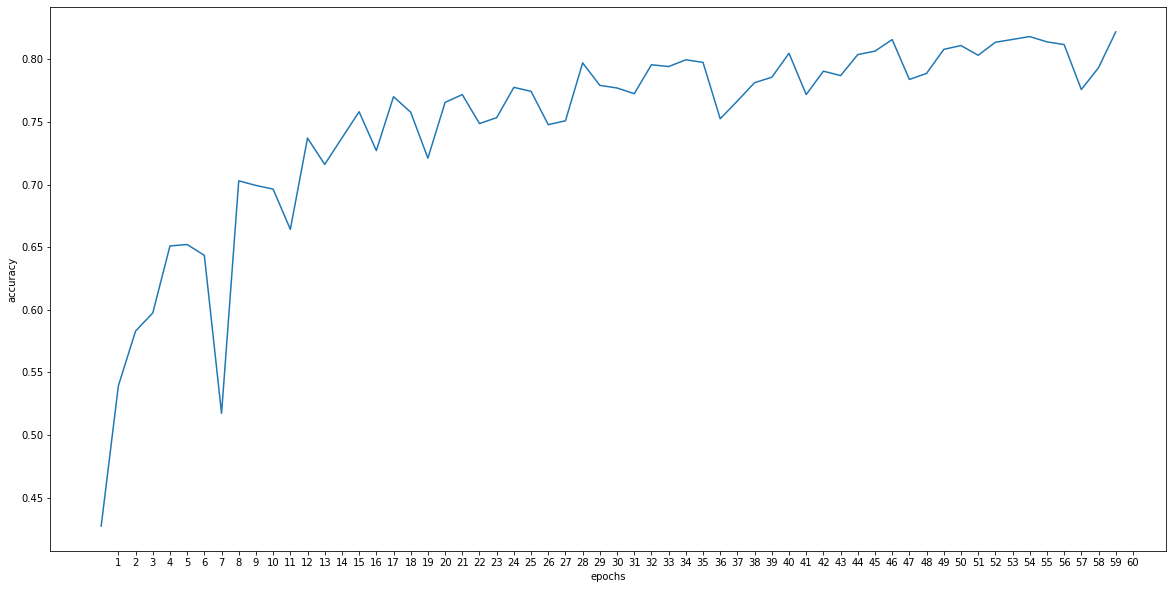

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.xticks(np.arange(1,61,1))
plt.plot(acr)